In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pylab import *
#-----------------------------------------------------
import scipy.integrate
#-----------------------------------------------------
from numpy import polynomial as po
from numpy.polynomial.hermite import hermval
#-----------------------------------------------------
from matplotlib import cm
import random as rd
from scipy import signal

from numpy import exp
from numpy import cos
from numpy import log
from math import sqrt
from numpy import tanh

import pandas as pd

Bing's new data:

Calibration peak: FWHM: 4.0 +- 0.5

Peak of interest:  FWHM: 8.6 +- 2.1

In [2]:
calibration_peak       = 4.0
calibration_peak_error = 0.5

peak_of_interest       = 8.6
peak_of_interest_error = 2.1

peak_of_interest_HWHM       = 8.6
peak_of_interest_error_HWHM = 2.1



unit_of_mom = 100

In [3]:
def lorentz(x,A,y,mu,B):
    return A* (1/(1+(x-mu)**2/y**2)) - B

In [3]:
# Calculation of correlation signal from exponentially damped staggered correlation G(i-j)= (1j^(i-j)*e^(-|i-j|/xi)+ disconn) 
N = 71 # lattice with 71 sites
matrix = np.zeros((N,N))
x_axis = np.linspace(-0.1,1.1,300) # spatial x axis on camera


res = []
xi_res = []

xi_array = [3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,
            4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,
            5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,
            6.0,6.1,6.2,6.3,6.4] # correlation lengths



for xi in xi_array:
    res = []
    for x in x_axis:
        for i in range(0,N):
            for j in range(0,N):
                if(abs(i-j)%2==0):
                    matrix[i][j] = (1j**(abs(i-j))*np.exp(-abs(i-j)/xi)+0.4) * np.exp(-2.*np.pi*1j*x*int(i)) * np.exp(2.*np.pi*1j*x*int(j))
        res.append(np.sum(matrix)/(N/2)**2)
    xi_res.append(res)

71


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


In [4]:
# Curve fitting

plt.figure(figsize=(14,10))
a=40 # lower fit boundary
b =140 # upper fit boundary
width_values = []
width_errors = []
for i in range(0,len(xi_array)):
    fitparams, fitcov = scipy.optimize.curve_fit(lorentz, x_axis[a:b], xi_res[i][a:b],p0=None) # fit Lorentzian
    plt.plot(x_axis,lorentz(x_axis,fitparams[0],fitparams[1],fitparams[2],fitparams[3]),color='red',linestyle='dashed')
    width_values.append(fitparams[1])
    width_errors.append(fitcov[1][1])

    
n = 40
colors = plt.cm.viridis(np.linspace(1,0,n)) # colormap



for i in range(0,len(xi_array)):
    plt.plot(x_axis,xi_res[i],color = colors[i],label=r'$\xi = $'+str(xi_array[i]),alpha=1)
    
#plt.title('chain length $N=70$, HWHM $= 0.043 \pm 0.015$ (red lines), backgr. subtracted, lines at half max',fontsize=18)
plt.xticks([0,0.25,0.5,0.75,1],['0','$\hbar k/2$','$\hbar k$','$3\hbar k/4$','$2\hbar k$'],fontsize=18)
#plt.legend(fontsize=18)
plt.xlim(0.2,0.3) # Zoom
plt.ylim(0.,0.4) # Zoom
plt.axhline(y=0,color='black')
plt.savefig('Plots/fitted.pdf') # save figure


print(width_values)
print(width_errors) # fit errors tiny as compared to experimental error
#print(fitparams)
#print(fitcov)

NameError: name 'xi_array' is not defined

<Figure size 1008x720 with 0 Axes>

In [5]:
N = 35 # shorter lattice
matrix = np.zeros((N,N))
x_axis = np.linspace(-0.1,1.1,300)


res_short = []
xi_array_short = [
                1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,
                2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,
                 3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,
            4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,
            5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,
            6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,
                7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,
                8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,
                9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9]
xi_res_short = []


for xi in xi_array_short:
    res_short = []
    for x in x_axis:
        for i in range(0,N):
            for j in range(0,N):
                if(abs(i-j)%2==0):
                    matrix[i][j] = (1j**(abs(i-j))*np.exp(-abs(i-j)/xi)+0.4) * np.exp(-2.*np.pi*1j*x*int(i)) * np.exp(2.*np.pi*1j*x*int(j))
        res_short.append(np.sum(matrix)/(N/2)**2)
    xi_res_short.append(res_short)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


90
[0.06053512 0.06454849 0.06856187 0.07257525 0.07658863 0.08060201
 0.08461538 0.08862876 0.09264214 0.09665552 0.1006689  0.10468227
 0.10869565 0.11270903 0.11672241 0.12073579 0.12474916 0.12876254
 0.13277592 0.1367893  0.14080268 0.14481605 0.14882943 0.15284281
 0.15685619 0.16086957 0.16488294 0.16889632 0.1729097  0.17692308
 0.18093645 0.18494983 0.18896321 0.19297659 0.19698997 0.20100334
 0.20501672 0.2090301  0.21304348 0.21705686 0.22107023 0.22508361
 0.22909699 0.23311037 0.23712375 0.24113712 0.2451505  0.24916388
 0.25317726 0.25719064 0.26120401 0.26521739 0.26923077 0.27324415
 0.27725753 0.2812709  0.28528428 0.28929766 0.29331104 0.29732441
 0.30133779 0.30535117 0.30936455 0.31337793 0.3173913  0.32140468
 0.32541806 0.32943144 0.33344482 0.33745819 0.34147157 0.34548495
 0.34949833 0.35351171 0.35752508 0.36153846 0.36555184 0.36956522
 0.3735786  0.37759197 0.38160535 0.38561873 0.38963211 0.39364548
 0.39765886 0.40167224 0.40568562 0.409699   0.41371237 0.4

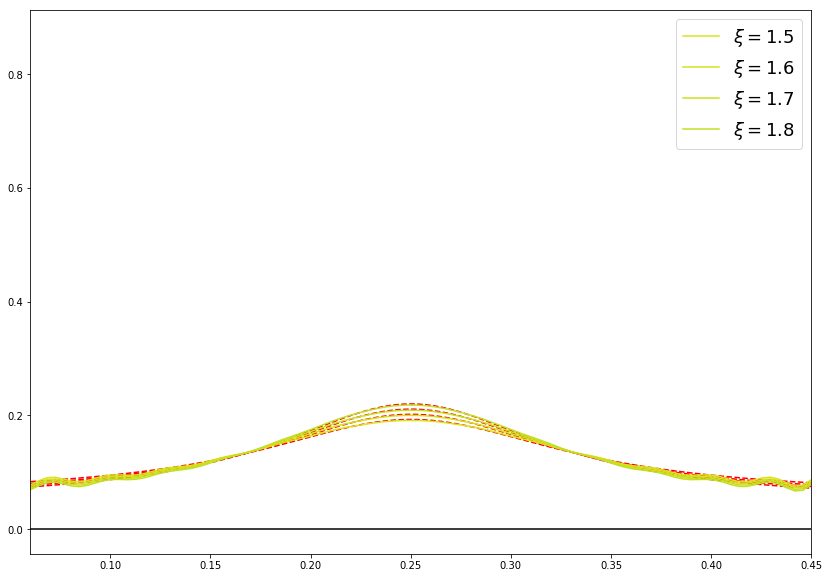

In [6]:
plt.figure(figsize=(14,10))

a=40 # lower fit boundary
b =140 # upper fit boundary

width_values_short = []
width_errors_short = []
for i in range(5,9):#range(0,len(xi_array_short)):
    fitparams, fitcov = scipy.optimize.curve_fit(lorentz, x_axis[a:b], xi_res_short[i][a:b],p0=None)
    plt.plot(x_axis,lorentz(x_axis,fitparams[0],fitparams[1],fitparams[2],fitparams[3]),color='red',linestyle='dashed')
    width_values_short.append(fitparams[1])
    width_errors_short.append(fitcov[1][1])


print(len(xi_array_short))
n = 90
colors = plt.cm.viridis(np.linspace(1,0,n))#colors



for i in range(5,9):#range(1,len(xi_array_short)):
    plt.plot(x_axis,xi_res_short[i],color = colors[i],label=r'$\xi = $'+str(xi_array_short[i]),alpha=1)
    
#plt.title('chain length $N=70$, HWHM $= 0.043 \pm 0.015$ (red lines), backgr. subtracted, lines at half max',fontsize=18)
#plt.xticks([0,0.25,0.5,0.75,1],['0','$\hbar k/2$','$\hbar k$','$3\hbar k/4$','$2\hbar k$'],fontsize=18)
plt.legend(fontsize=18)
plt.xlim(0.06,0.45)
#plt.ylim(-0.02,0.04)
plt.axhline(y=0,color='black')
#plt.savefig('Plots/value_connected_2-6.pdf')

print(x_axis[a:b])
print(width_values_short)
print(width_errors_short)
#print(fitparams)
#print(fitcov)

In [ ]:
N = 100
matrix = np.zeros((N,N))
x_axis = np.linspace(0.2,0.5,100)#np.linspace(-0.1,1.1,300)


res_long = []
xi_array_long = [.1,.2,.3,.4,.5,.6,.7,.8,.9,
                1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,
                2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,
                 3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,
            4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,
            5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,
            6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,
                7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,
                8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,
                9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9]
xi_res_long = []


for xi in xi_array_long:
    res_long = []
    for x in x_axis:
        for i in range(0,N):
            for j in range(0,N):
                if(abs(i-j)%2==0):
                    matrix[i][j] = (1j**(abs(i-j))*np.exp(-abs(i-j)/xi)+0.4) * np.exp(-2.*np.pi*1j*x*int(i)) * np.exp(2.*np.pi*1j*x*int(j)) # including unimportant offset 0.4
        res_long.append(np.sum(matrix)/(N/2)**2)
    xi_res_long.append(res_long)

100


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: ComplexWarning: Casting complex values to real discards the imaginary part


[[ 1.49552007e-07  7.08115072e-09  2.78760657e-13  2.04221933e-09]
 [ 7.08115072e-09  9.93641508e-10 -1.15388169e-13 -1.53884651e-09]
 [ 2.78760657e-13 -1.15388169e-13  3.68182826e-10  7.89532921e-13]
 [ 2.04221933e-09 -1.53884651e-09  7.89532921e-13  9.27396904e-09]]


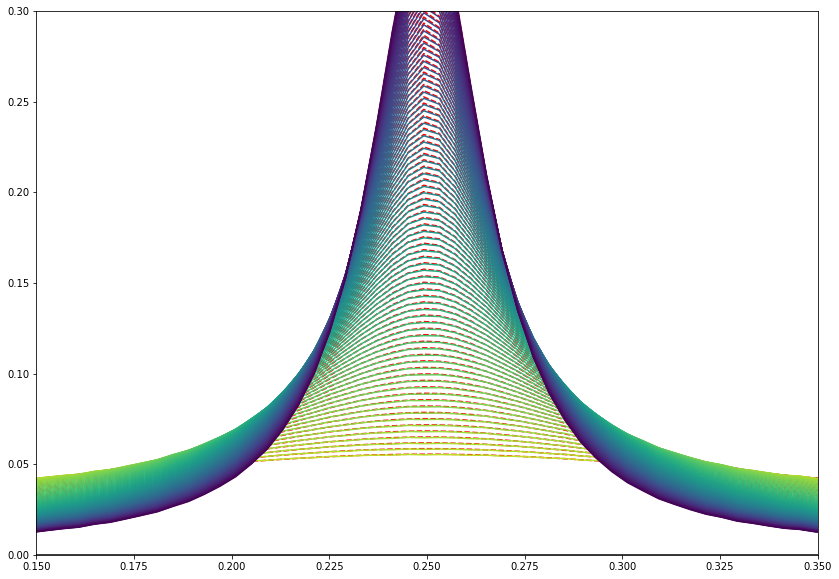

In [379]:


plt.figure(figsize=(14,10))

width_values_long = []
width_errors_long = []


ind = len(xi_array_long)-1



for i in range(10,len(xi_array_long)):
    fitparams, fitcov = scipy.optimize.curve_fit(lorentz, x_axis[a:b], xi_res_long[i][a:b],p0=None)
    plt.plot(x_axis,lorentz(x_axis,fitparams[0],fitparams[1],fitparams[2],fitparams[3]),color='red',linestyle='dashed')
    width_values_long.append(fitparams[1])
    width_errors_long.append(fitcov[1][1])
n = 100
colors = plt.cm.viridis(np.linspace(1,0,n))


for i in range(10,len(xi_array_long)):
    plt.plot(x_axis,xi_res_long[i],color = colors[i],label=r'$\xi = $'+str(xi_array_long[i]),alpha=1)
 


#plt.title('chain length $N=70$, HWHM $= 0.043 \pm 0.015$ (red lines), backgr. subtracted, lines at half max',fontsize=18)
#plt.xticks([0,0.25,0.5,0.75,1],['0','$\hbar k/2$','$\hbar k$','$3\hbar k/4$','$2\hbar k$'],fontsize=18)
#plt.legend(fontsize=18)
plt.xlim(0.15,0.35)
plt.ylim(0.00,0.3)
plt.axhline(y=0,color='black')
#plt.savefig('Plots/value_connected_2-6.pdf')


print(width_values_long)
print(width_errors_long)
#print(fitparams)
#print(fitcov)

0.07613146524269712
0.07613146524269712
[3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4]


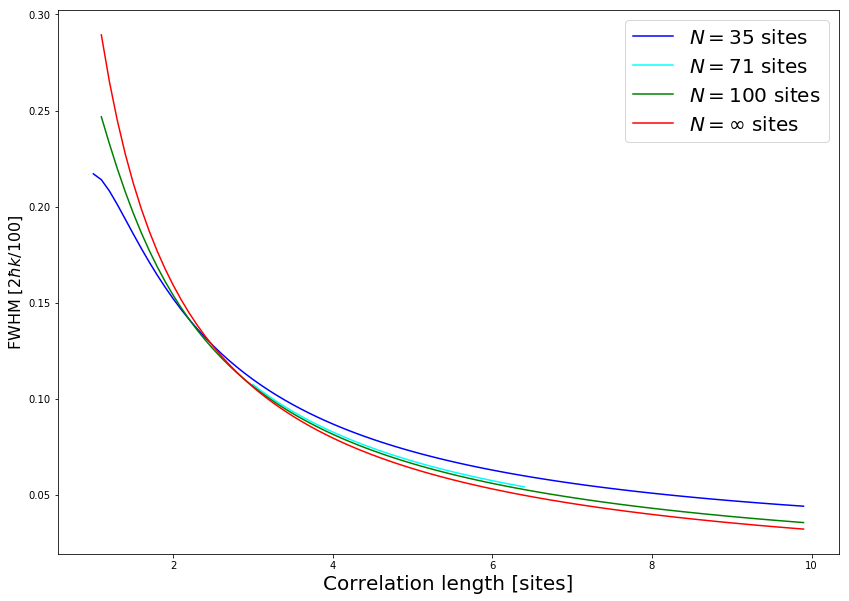

In [399]:
plt.figure(figsize=(14,10))
print(peak_of_interest_clean_unit_HWHM)

#plt.errorbar(xi_array,np.multiply(2.,np.abs(width_values)),yerr=np.multiply(1,width_errors),linestyle='-',linewidth=2)
plt.plot(xi_array_short,np.multiply(2.,np.abs(width_values_short)),color='blue',label =r'$N=35$ sites')
plt.plot(xi_array,np.multiply(2.,np.abs(width_values)),color='cyan',label =r'$N=71$ sites')
plt.plot(xi_array_long[10:],np.multiply(2.,np.abs(width_values_long)),color='green',label =r'$N=100$ sites')





plt.plot(xi_array_long[10:],np.divide(1./np.pi,xi_array_long[10:]),color='red',label =r'$N=\infty$ sites')
plt.legend(fontsize = 20)

#plt.xlim(2,7)
#plt.ylim(0.1,.5)
plt.xlabel('Correlation length [sites]',fontsize=20)
plt.ylabel(r'FWHM $[2\hbar k/100]$',fontsize=16)
#plt.xticks([3.0,4.,5.,6.],['3','4','5','6'],fontsize=16)
#plt.yticks([.06,.07,.08,.09,.1],['6','7','8','9','10'],fontsize=16)
print(peak_of_interest_clean_unit_HWHM)#+peak_of_interest_clean_error_unit_HWHM)
#plt.savefig('Plots/correlation_finitesize.pdf')
#np.savetxt('Plots/widths.txt',np.multiply(2.,np.abs(width_values_long)))
#np.savetxt('Plots/corr_lengths.txt',xi_array_long[10:])
print(xi_array)

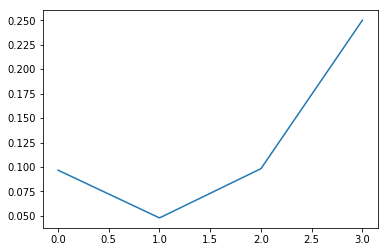